In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import os

## Contexte
Trouvez les meilleures stratégies à améliorer pour la prochaine campagne marketing. Comment l’institution financière peut-elle avoir une plus grande efficacité pour ses futures campagnes marketing ? Pour répondre à cette question, nous devons analyser la dernière campagne marketing réalisée par la banque et identifier les modèles qui nous aideront à tirer des conclusions afin de développer des stratégies futures.
### Description des attributs/caractéristiques :
L'ensemble de données comporte 17 attributs, dont un attribut dépendant, et il existe 45 211 instances/points de données. Nous avons donc 16 attributs prédicteurs/indépendants et 1 attribut dépendant.
#### attributs du client bancaire :
age : âge du client (numérique)
job : type d'emploi (catégorique : "admin.", "inconnu", "chômeur", "gestion", "femme de ménage", "entrepreneur", "étudiant", "col bleu", "indépendant", " retraité", "technicien", "services")
matrimonial : état civil (catégorique : "marié", "divorcé", "célibataire")
éducation : niveau d'études le plus élevé du client (catégorique : "inconnu", "secondaire", "primaire", "tertiaire")
défaut : le crédit est-il en défaut ? (binaire/2-catégories : "oui", "non")
balance : solde annuel moyen, en euros (numérique)
housing : a-t-il un prêt logement ? (binaire/2-catégories : "oui", "non")
loan : a un prêt personnel ? (binaire/2-catégories : "oui", "non")
#### lié au dernier contact de la campagne en cours :
contact : type de communication du contact (catégorique : "inconnu", "téléphone", "cellulaire")
day : dernier jour de contact du mois (numérique)
month : mois du dernier contact de l'année (catégorique : "jan", "feb", "mar", ..., "nov", "dec")
duration : durée du dernier contact, en secondes (numérique)
#### autres attributs :
compaign : nombre de contacts effectués lors de cette campagne et pour ce client (numérique, inclut le dernier contact)
pdays : nombre de jours écoulés après que le client a été contacté pour la dernière fois lors d'une campagne précédente (numérique, -1 signifie que le client n'a pas été contacté auparavant)
previous : nombre de contacts effectués avant cette campagne et pour ce client (numérique)
poutcome : résultat de la campagne marketing précédente (catégorique : 'inconnu', 'autre', 'échec', 'succès')
#### Variable de sortie (cible souhaitée) :
deposit : le client a-t-il souscrit un dépôt ? (binaire : "oui", "non")

In [2]:
data=pd.read_csv('bank.csv')

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
data.shape

(11162, 17)

Text(0.5, 0, 'Deposit')

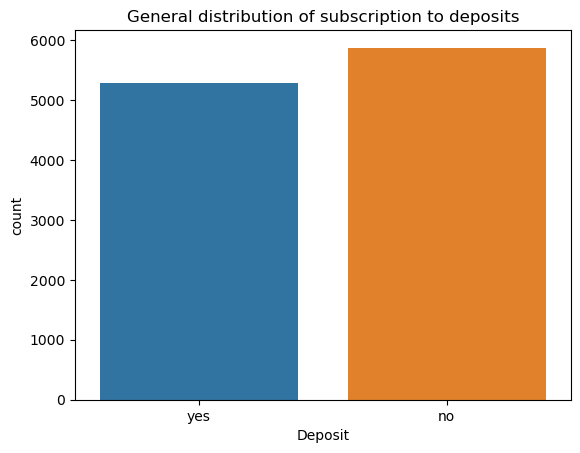

In [8]:
sns.countplot(x=data['deposit'])
plt.title('General distribution of subscription to deposits')
plt.xlabel('Deposit')

In [9]:
data.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

### Observation
On visualise que notre Dataset est trés équilibré

# Age

## quel est l'impact de l'âge sur la souscription au dépôt ?

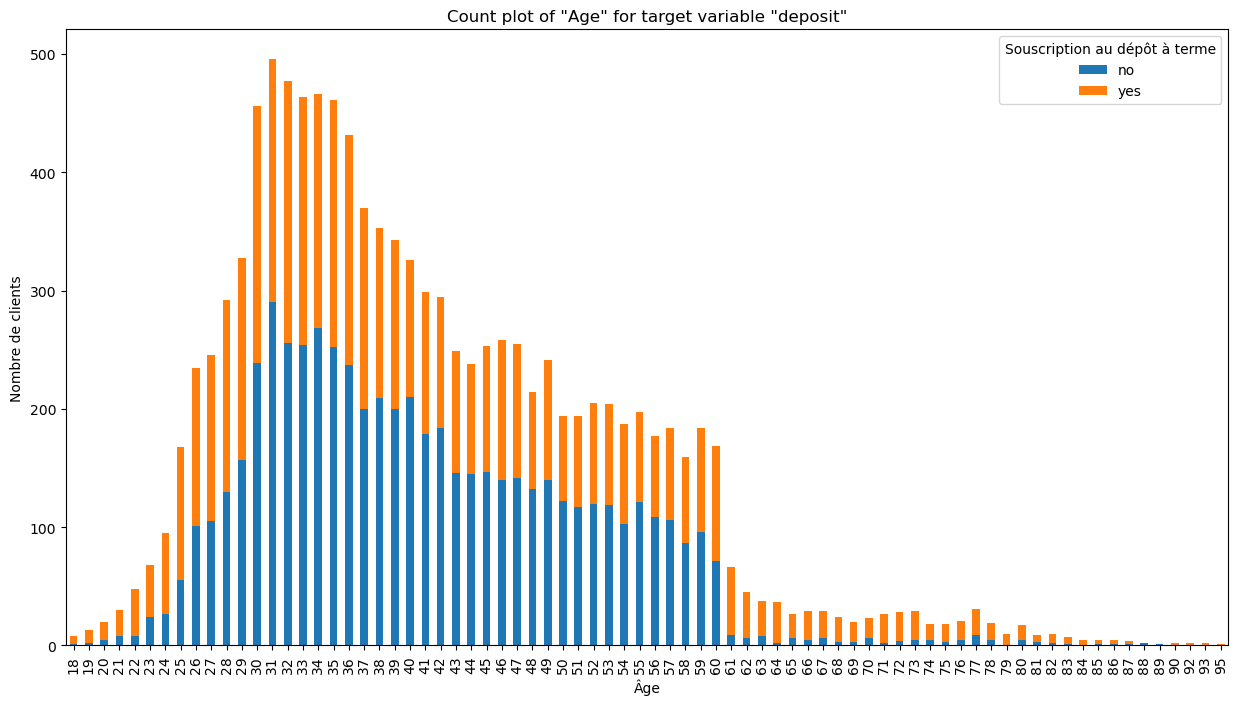

In [10]:
age_deposit_counts = data.groupby(['age', 'deposit']).size().unstack()
age_deposit_counts.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.xlabel('Âge')
plt.ylabel('Nombre de clients')
plt.title('Count plot of "Age" for target variable "deposit"')
plt.legend(title='Souscription au dépôt à terme', loc='upper right')
plt.show()

In [11]:
grps = [data]
for column in grps:
    column.loc[column["age"] < 30,  'age_group'] = 30
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'age_group'] = 40
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

Text(0.5, 1.0, 'Count plot of "age_group" for target variable "deposit"')

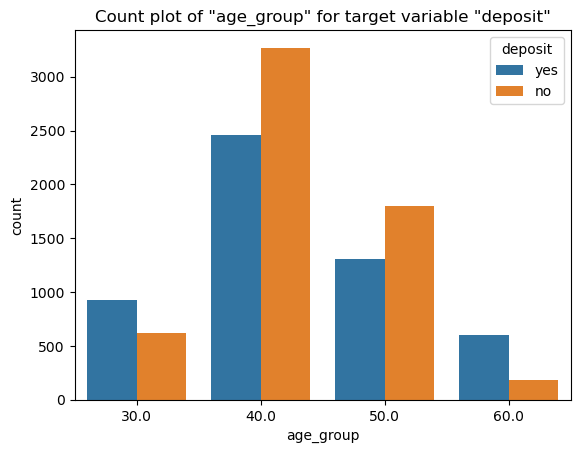

In [12]:
sns.countplot(x='age_group', data=data, hue='deposit')
plt.title('Count plot of "age_group" for target variable "deposit"')

## Conclusion:
#### Les personnes plus âgées sont plus enclines à souscrire à un dépôt  en raison de leur stabilité financière.

# jobs

## Comparaison des différents types d'emplois et la souscription au dépôt  

In [13]:
data.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

Text(0.5, 1.0, 'Count plot of "jobs" for target variable "deposit"')

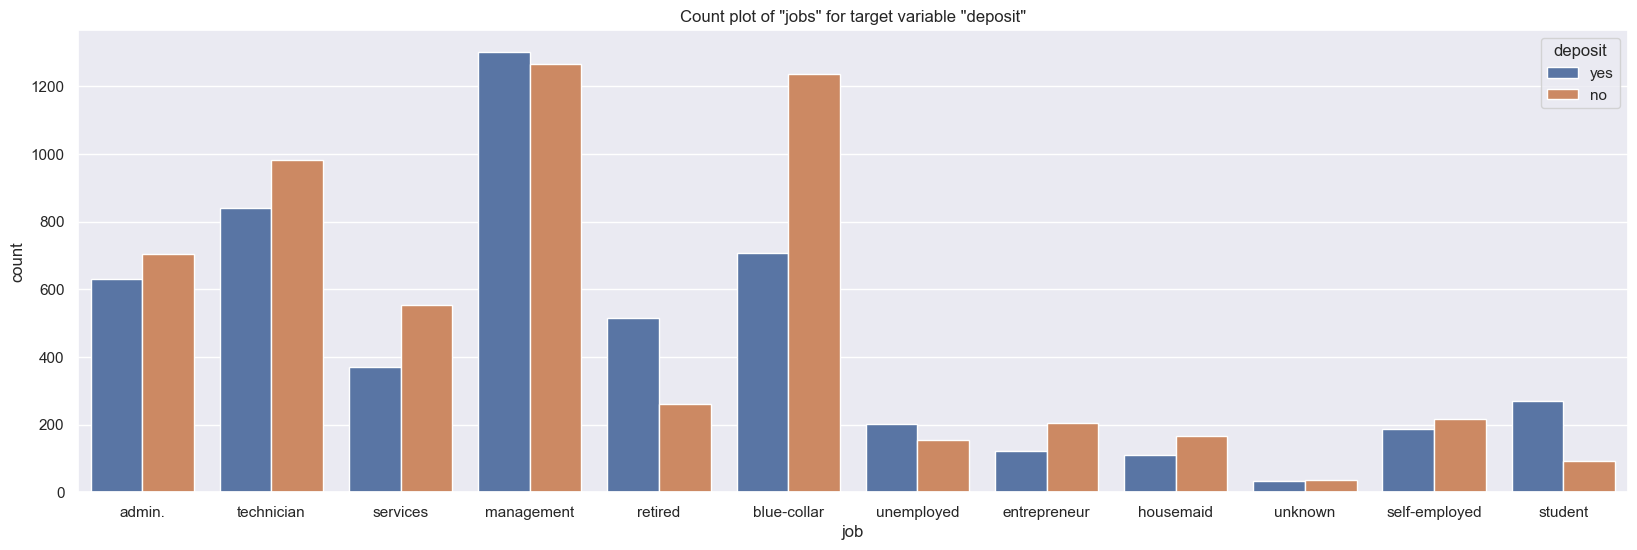

In [14]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=data['job'], data=data, hue=data['deposit'])
plt.title('Count plot of "jobs" for target variable "deposit"')

In [15]:
import pandas as pd


data_dict = {
    'Job': ['Blue-collar', 'Management', 'Technician', 'Admin', 'Services', 'Retired', 'Self-employed',
            'Entrepreneur', 'Unemployed', 'Housemaid', 'Student', 'Unknown'],
    'Total Clients': [
        len(data[data['job'] == 'blue-collar']), len(data[data['job'] == 'management']),
        len(data[data['job'] == 'technician']), len(data[data['job'] == 'admin.']),
        len(data[data['job'] == 'services']), len(data[data['job'] == 'retired']),
        len(data[data['job'] == 'self-employed']), len(data[data['job'] == 'entrepreneur']),
        len(data[data['job'] == 'unemployed']), len(data[data['job'] == 'housemaid']),
        len(data[data['job'] == 'student']), len(data[data['job'] == 'unknown'])
    ],
    'Success Rate': [
        data[data['job'] == 'blue-collar'].deposit.value_counts(normalize=True).get('yes', 0) * 100,
        data[data['job'] == 'management'].deposit.value_counts(normalize=True).get('yes', 0) * 100,
        data[data['job'] == 'technician'].deposit.value_counts(normalize=True).get('yes', 0) * 100,
        data[data['job'] == 'admin.'].deposit.value_counts(normalize=True).get('yes', 0) * 100,
        data[data['job'] == 'services'].deposit.value_counts(normalize=True).get('yes', 0) * 100,
        data[data['job'] == 'retired'].deposit.value_counts(normalize=True).get('yes', 0) * 100,
        data[data['job'] == 'self-employed'].deposit.value_counts(normalize=True).get('yes', 0) * 100,
        data[data['job'] == 'entrepreneur'].deposit.value_counts(normalize=True).get('yes', 0) * 100,
        data[data['job'] == 'unemployed'].deposit.value_counts(normalize=True).get('yes', 0) * 100,
        data[data['job'] == 'housemaid'].deposit.value_counts(normalize=True).get('yes', 0) * 100,
        data[data['job'] == 'student'].deposit.value_counts(normalize=True).get('yes', 0) * 100,
        data[data['job'] == 'unknown'].deposit.value_counts(normalize=True).get('yes', 0) * 100
    ]
}

df = pd.DataFrame(data_dict)

df


,Job,Total Clients,Success Rate
0,Blue-collar,1944,36.419753
1,Management,2566,50.701481
2,Technician,1823,46.077894
3,Admin,1334,47.301349
4,Services,923,39.978332
5,Retired,778,66.323907
6,Self-employed,405,46.172840
7,Entrepreneur,328,37.500000
8,Unemployed,357,56.582633
9,Housemaid,274,39.781022


### Observations: 
Les clients les plus contactés appartiennent au type d'emploi : 'blue-collar', 'management' & 'technician'.

Le taux de réussite est le plus élevé pour les 'Student'

# poutcome

## quel est l'impact du résultat de la précédente campagne sur la souscription actuelle

In [16]:
data.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

Text(0.5, 1.0, 'Count plot of "poutcome" for target variable "deposit"')

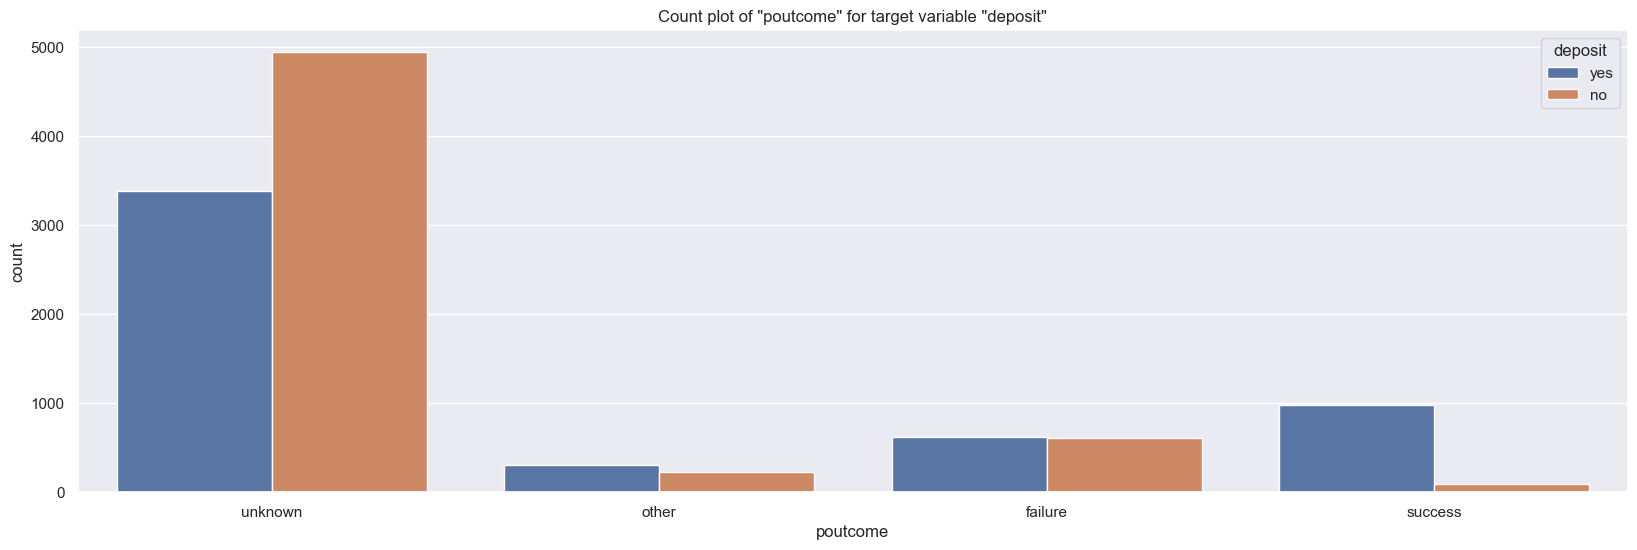

In [17]:
sns.countplot(x=data['poutcome'], data=data, hue=data['deposit'])
plt.title('Count plot of "poutcome" for target variable "deposit"')

## Observation:
### La plupart des clients contactés avaient un résultat antérieur inconnu « unknown ».

# education

## quel est l'impact niveau d'éducation sur la souscription au dépôt? 

In [18]:
data.education.value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

Text(0.5, 1.0, 'Count plot of "education" for target variable "deposit"')

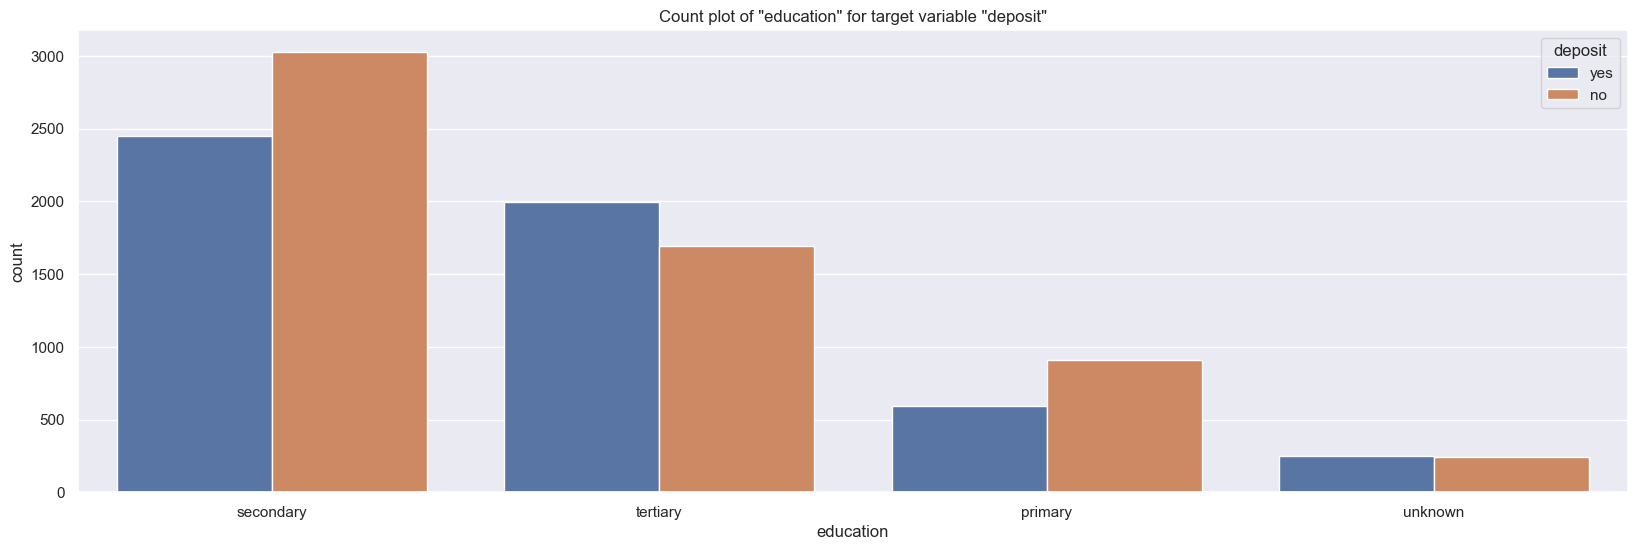

In [19]:
sns.countplot(x=data['education'], data=data, hue=data['deposit'])
plt.title('Count plot of "education" for target variable "deposit"')

Observation:
La plupart des personnes contactées ont fait des études secondaires ou supérieures.

## Conclusion
### Les personnes ayant un niveau d'éducation plus élevé pourraient être plus enclines à investir dans des dépôts à terme en raison de leur compréhension accrue des avantages financiers.

# default

In [20]:
data.default.value_counts()

no     10994
yes      168
Name: default, dtype: int64

Text(0.5, 1.0, 'Count plot of "default" for target variable "deposit"')

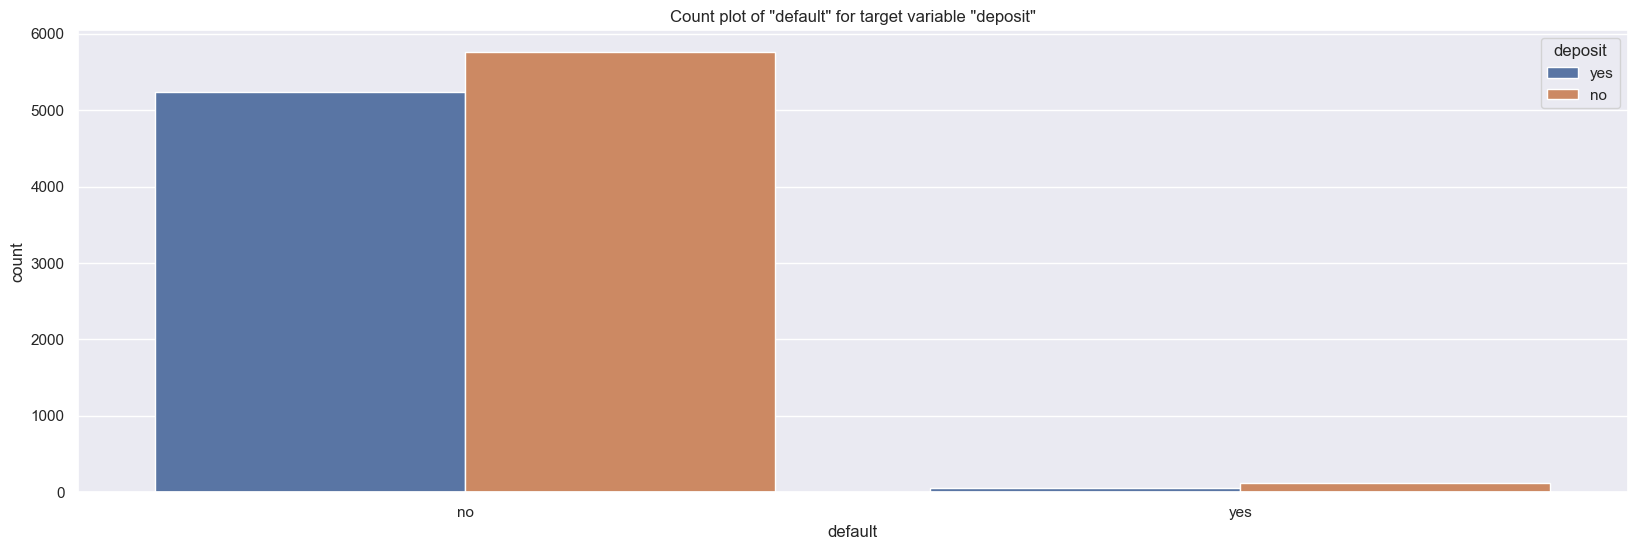

In [21]:
sns.countplot(x=data['default'], data=data, hue=data['deposit'])
plt.title('Count plot of "default" for target variable "deposit"')

In [22]:
data[data['default'] == 'yes'].deposit.count()

168

In [23]:
data[data['default'] == 'no'].deposit.count()

10994

Observation:
Très peu de clients contactés sont défaillants.

# Loan

In [24]:
data.loan.value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

Text(0.5, 1.0, 'Count plot of "loan" for target variable "deposit"')

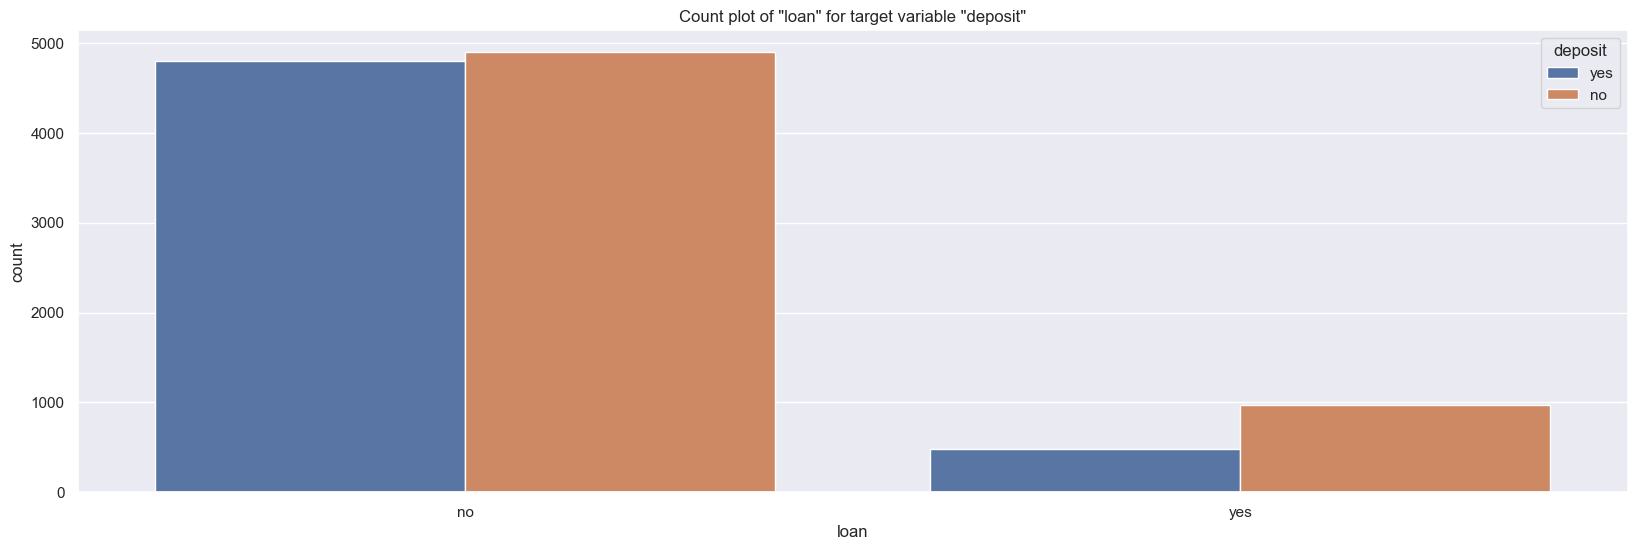

In [25]:
sns.countplot(x=data['loan'], data=data, hue=data['deposit'])
plt.title('Count plot of "loan" for target variable "deposit"')

Observation:
moins de clients contactés ont un prêt.

# Contact:

## quel est l'impact de type de communication sur la souscription au depot?

In [26]:
data.contact.value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

Text(0.5, 1.0, 'Count plot of "contact" for target variable "deposit"')

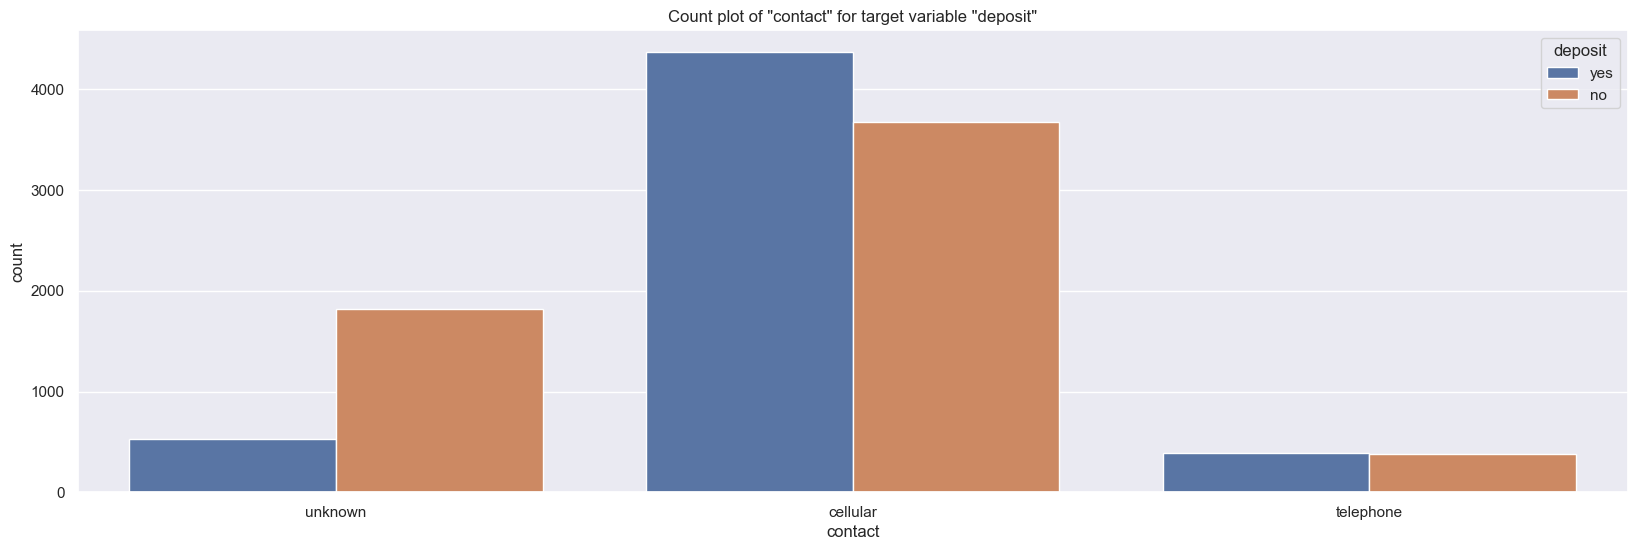

In [27]:
sns.countplot(x=data['contact'], data=data, hue=data['deposit'])
plt.title('Count plot of "contact" for target variable "deposit"')

## Observation:
### -La plupart des gens sont contactés via cellulaire.

### -les clients contactés via cellulaire pourrait etre plus disposés à souscrire à un dépôt.

# Month

In [28]:
data.month.value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

Text(0.5, 1.0, 'Count plot of "month" for target variable "deposit"')

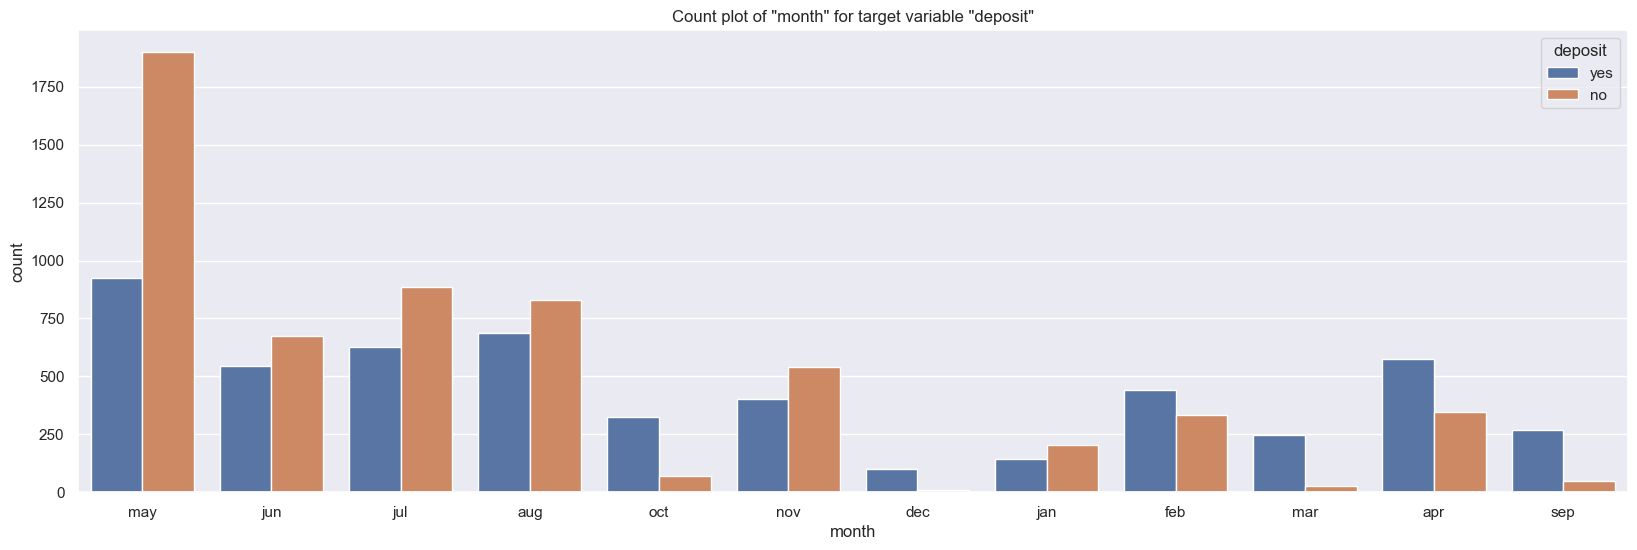

In [29]:
sns.countplot(x=data['month'], data=data, hue=data['deposit'])
plt.title('Count plot of "month" for target variable "deposit"')

In [30]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

for month in months:
    total_clients = len(data[data['month'] == month])
    success_rate = data[data['month'] == month].deposit.value_counts(normalize=True).get('yes', 0) * 100
    print(f"Clients contacted in {month.capitalize()}: {total_clients}, Success rate: {success_rate:.2f}%")


Clients contacted in Jan: 344, Success rate: 41.28%
Clients contacted in Feb: 776, Success rate: 56.83%
Clients contacted in Mar: 276, Success rate: 89.86%
Clients contacted in Apr: 923, Success rate: 62.51%
Clients contacted in May: 2824, Success rate: 32.75%
Clients contacted in Jun: 1222, Success rate: 44.68%
Clients contacted in Jul: 1514, Success rate: 41.41%
Clients contacted in Aug: 1519, Success rate: 45.29%
Clients contacted in Sep: 319, Success rate: 84.33%
Clients contacted in Oct: 392, Success rate: 82.40%
Clients contacted in Nov: 943, Success rate: 42.74%
Clients contacted in Dec: 110, Success rate: 90.91%


### observation:
    -La plupart des clients sont contactés au mois de mai mais le taux de réussite n'est que de 32.75 %.
    -Decembre a le taux de réussite le plus élevé.

# Marital

## Impact de l'état matrimonial sur la souscription

Text(0.5, 1.0, 'Count Plot of "marital" for target variable "deposit"')

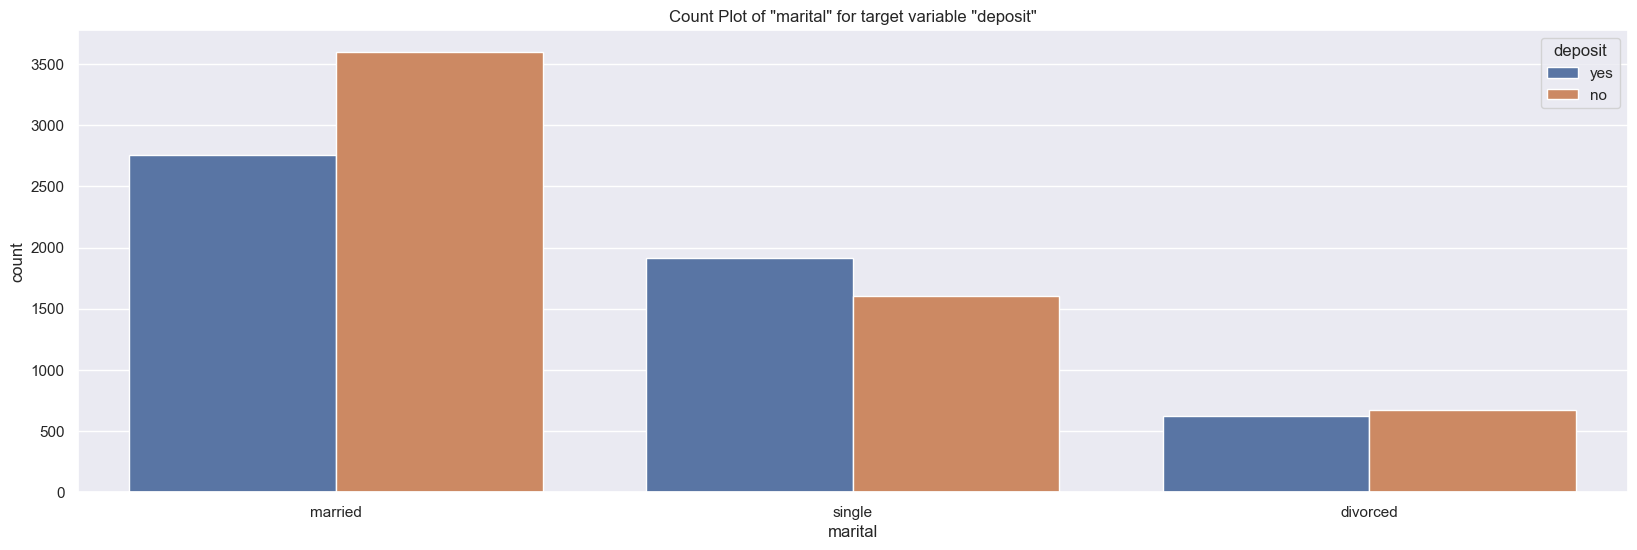

In [31]:
sns.countplot(x=data['marital'], data=data, hue=data['deposit'])
plt.title('Count Plot of "marital" for target variable "deposit"')

## Conclusion
### Les personnes mariées pourraient être plus enclines à souscrire à un dépôt à terme pour des raisons de sécurité financière familiale.

# Housing

## quel est l'impact du prét de logement sur la souscription au depot?

Text(0.5, 1.0, 'Count Plot of "housing" for target variable "deposit"')

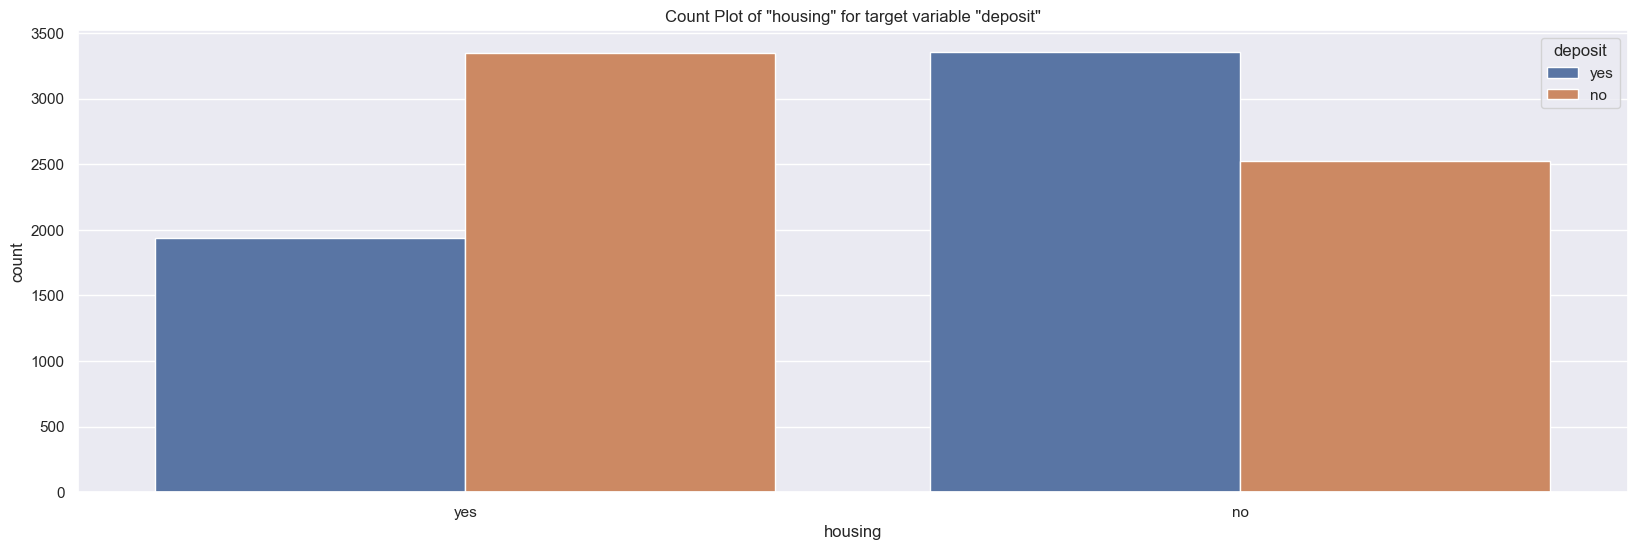

In [32]:
sns.countplot(x=data['housing'], data=data, hue=data['deposit'])
plt.title('Count Plot of "housing" for target variable "deposit"')

In [33]:
data.housing.value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

## Conclusion
### les personnes qui n'ont pas un prét de logement pourraient être plus enclines à investir dans des dépôts.